<a href="https://colab.research.google.com/github/bigpatek/Colab/blob/main/Dataset_%22LoanPrediction%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла Train.csv
train = pd.read_csv('/content/Train.csv')
train.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [ ]:
test = pd.read_csv('/content/Test.csv')
test.head(3)

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


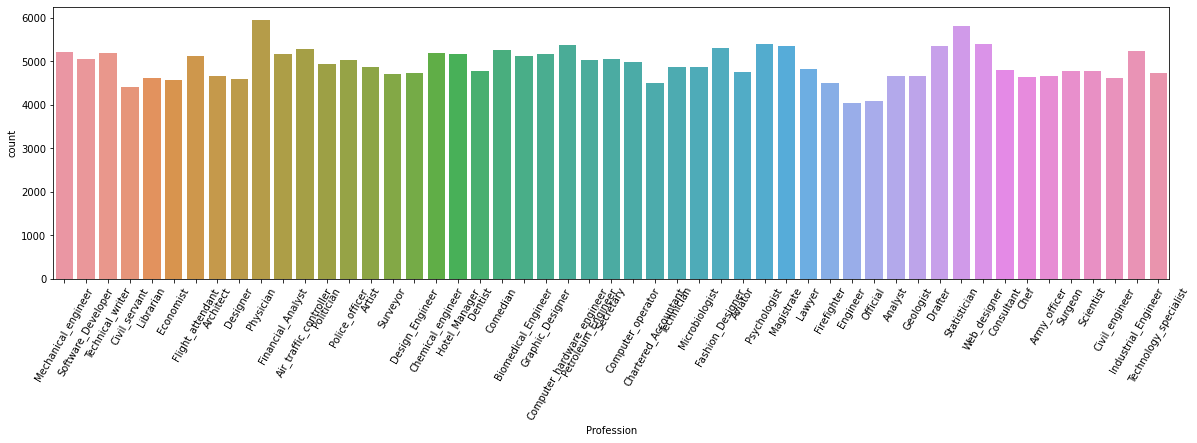

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.xticks(rotation="60")
sns.countplot(x='Profession', data = train)
plt.show()



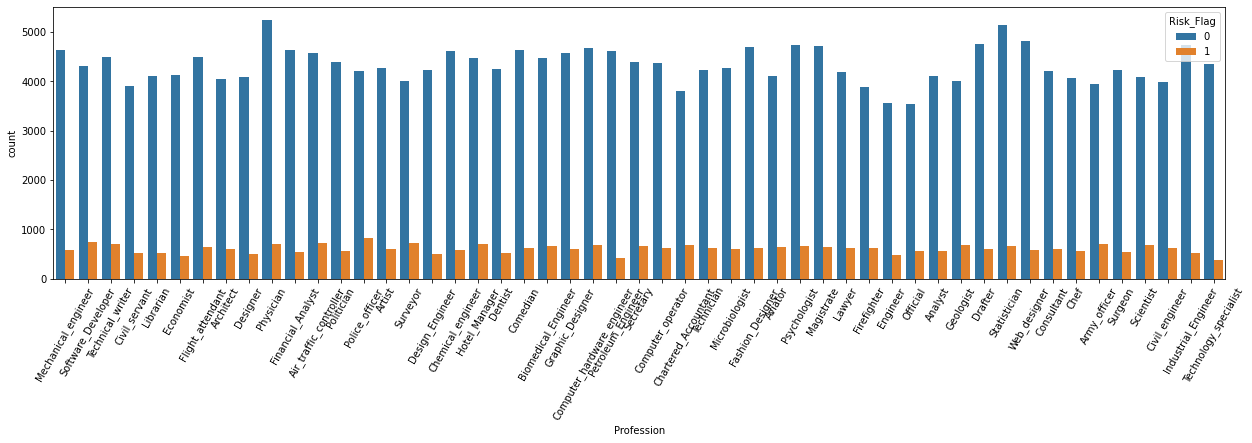

In [ ]:
plt.figure(figsize=(21,5))
plt.xticks(rotation="60")
sns.countplot(x = 'Profession', hue = 'Risk_Flag', data = train)
plt.show()

In [ ]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
pd.get_dummies(train['Married/Single']).head(3)


,married,single
0,0,1
1,0,1
2,1,0


In [ ]:
SingleOrMarried = pd.get_dummies(train['Married/Single'], drop_first = True)
SingleOrMarried.head(3)



,single
0,1
1,1
2,0


In [ ]:
CarOwner = pd.get_dummies(train['Car_Ownership'], drop_first = True, prefix='Car_Owner')
CarOwner.head(3)

,Car_Owner_yes
0,0
1,0
2,0


In [ ]:
HouseOwner = pd.get_dummies(train['House_Ownership'], drop_first = True, prefix='House_')
HouseOwner.head(3)

,House__owned,House__rented
0,0,1
1,0,1
2,0,1


In [ ]:
train = pd.concat([train, SingleOrMarried, CarOwner, HouseOwner ], axis = 1)
train.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,Car_Owner_yes,House__owned,House__rented
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,1
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,0,0,1
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,0,1


In [ ]:
train.drop(['Profession', 'CITY', 'STATE', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Id'], axis = 1, inplace = True)
train.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,Car_Owner_yes,House__owned,House__rented
0,1303834,23,3,3,13,0,1,0,0,1
1,7574516,40,10,9,13,0,1,0,0,1
2,3991815,66,4,4,10,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Age', 'Income', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,Car_Owner_yes,House__owned,House__rented
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,0,1,0,0,1
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,0,1,0,0,1
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,0,0,0,0,1


In [ ]:
train.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'single', 'Car_Owner_yes', 'House__owned',
       'House__rented'],
      dtype='object')

In [ ]:
#Преобразуем эти переменные в тип str через функцию map().
train.columns = train.columns.map(str)

In [ ]:
# поместим в X_train все кроме столбца Risk_Flag
x_train = train.drop('Risk_Flag', axis = 1)
# столбец 'Risk_Flag' станет нашей целевой переменной (y_train)
y_train = train['Risk_Flag']

x_train.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,single,Car_Owner_yes,House__owned,House__rented
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,1,0,0,1
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,1,0,0,1
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,0,0,0,1


In [ ]:
# импортируем логистическую регрессию 
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [ ]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(x_train)

In [ ]:
# построим матрицу ошибок

from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения

conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,221004,0
1,30996,0


In [ ]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns =
['Прогноз вне риска', 'Прогноз риск'], index = ['Факт вне риска', 'Факт риск'])
conf_matrix_labels

,Прогноз вне риска,Прогноз риск
Факт вне риска,221004,0
Факт риск,30996,0


In [ ]:
# рассчитаем метрику accuracy вручную
round((221004 + 0)/(221004 + 30996), 3)

0.877

In [ ]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

#На обучающей выборке наша модель показала результат в 87,7%

0.877

In [ ]:
#Посмотрим на тестовые данные
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [ ]:
# для начала дадим датасету привычное название X_test
x_test = test

# выполним one-hot encoding категориальных переменных
SingleOrMarried = pd.get_dummies(x_test['Married/Single'], drop_first = True)
CarOwner = pd.get_dummies(x_test['Car_Ownership'], drop_first = True, prefix='Car_Owner')
HouseOwner = pd.get_dummies(x_test['House_Ownership'], drop_first = True, prefix='House_')

# присоединим новые столбцы к исходному датафрейму
x_test = pd.concat([x_test, SingleOrMarried, CarOwner, HouseOwner ], axis = 1)

# и удалим данные, которые теперь не нужны
x_test.drop(['Profession', 'CITY', 'STATE', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'ID'], axis = 1, inplace = True)

#Посмотрим на результат
x_test.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,single,Car_Owner_yes,House__owned,House__rented
0,7393090,59,19,4,13,1,0,0,1
1,1215004,25,5,5,10,1,0,0,1
2,8901342,50,12,9,14,1,0,0,1


In [ ]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

x_test.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,single,Car_Owner_yes,House__owned,House__rented
0,0.832425,0.530123,1.485289,-0.639936,0.716356,1,0,0,1
1,-1.314007,-1.462396,-0.847042,-0.365742,-1.427981,1,0,0,1
2,1.356432,0.002692,0.319123,0.731036,1.431135,1,0,0,1


In [ ]:
#Превращаем названия столбцов в строки
x_test.columns = x_test.columns.map(str)

#Делаем прогноз на тестовой выборке
y_pred_test = model.predict(x_test)

#На выходе получаем массив с выборкой

#Посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# возьмем индекс клиентов из столбца ID тестовой выборки
ids = test['ID']

# создадим датафрейм из словаря, в котором первая пара ключа и значения - это id клиента, вторая - прогноз "на тесте"
result = pd.DataFrame({'ClienID': ids, 'Risk_Flag': y_pred_test})

#Посмотрим, что получилось

result.head(10)

,ClienID,Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [ ]:
# применим метод .download() объекта files
from google.colab import files

files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>